# Reconocimiento de patrones: Preparación de datos
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
![ ](images/blank.png)
![agents](images/binary_data_under_a_magnifying.jpg)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Limpieza%20de%20datos%20II.ipynb)

## Valores atípicos

Un valor atípico es una observación que se ubica fuera del patrón general de distribución de los datos ([Mathworld](http://mathworld.wolfram.com/Outlier.html)). 

![](images/Outlier.png)
![ ](images/blank.png)

Los valores atípicos pueden deberse a diferentes causas, siendo las principales:
* Casos que no se ajustan al modelo de estudio
* Errores en la medición

El tratamiento dado a los valores atípicos depende del origen de la inconsistencia. En el caso de errores en la medición pueden eliminarse o ajustarse (como en el caso de [valores faltantes](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Limpieza%20de%20datos%20I.ipynb)). Cuando la causa es que los casos no se ajustan al modelo utilizado pueden indicar la necesidad de replantear el modelo (incluyendo modificaciones a la teoría, como sucedía con el caso del movimiento anómalo de Mercurio). Sin embargo, también pueden representar casos singulares o excepcionales. En cualquier caso, es importante detectar estos valores, pues su presencia generan tendencias en el análisis global de los datos.

Una forma común de analizar la presencia de valores atípicos es a través de los diagramas de caja (boxplots). El diagrama de caja es una descripción gráfica de la agrupación de los datos en base a sus cuartiles y tiene la siguiente estructura:

[![ ](images/457px-Boxplot.svg.png)](https://es.wikipedia.org/wiki/Diagrama_de_caja)
![ ](images/blank.png)

El espaciado entre los componentes de una caja reflejan la dispersión y tendencias en los datos. La parte principal de esta representación es la propia caja. La tapa inferior corresponde al primer cuartil (Q1, el punto que separa el 25% de los datos inferiores), la línea intermedia refleja la mediana o segundo cuartil (Q2) y la tapa superior corresponde al tercer cuartil (Q3, el punto que delimita el 75% de los datos inferiores). RIC es el *rango inter cuartil* y es el 50% de los datos que quedan al centro del conjunto total de datos. Las líneas punteadas se denomina *bigotes* (*whiskers*); los extremos de los bigotes inferior y superior suelen seleccionarse como el menor dato que aún queda a una distancia máxima de 1.5 veces RIC por abajo de Q1 y el dato máximo a una distancia igual o menor de 1.5 RIC por arriba de Q3. 

Analizamos la submuesytra de datos de diabetes, en primera instancia para la variable '*gl2h*' y posteriormente para todo el conjunto, utilizando los datos con valores faltantes en cero.

In [1]:
"""
Reconocimiento de patrones: Valores atípicos
"""

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline  

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

os.chdir('Data sets/Pima Indian Data Set')

    emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0     6   148   72   35     0  33.6  0.627    50      1
1     1    85   66   29     0  26.6  0.351    31      0
2     8   183   64    0     0  23.3  0.672    32      1
3     1    89   66   23    94  28.1  0.167    21      0
4     0   137   40   35   168  43.1  2.288    33      1
5     5   116   74    0     0  25.6  0.201    30      0
6     3    78   50   32    88  31.0  0.248    26      1
7    10   115    0    0     0  35.3  0.134    29      0
8     2   197   70   45   543  30.5  0.158    53      1
9     8   125   96    0     0   0.0  0.232    54      1
10    4   110   92    0     0  37.6  0.191    30      0
11   10   168   74    0     0  38.0  0.537    34      1
12   10   139   80    0     0  27.1  1.441    57      0
13    1   189   60   23   846  30.1  0.398    59      1
14    5   166   72   19   175  25.8  0.587    51      1
15    7   100    0    0     0  30.0  0.484    32      1
16    0   118   84   47   230  45.8  0.551    31

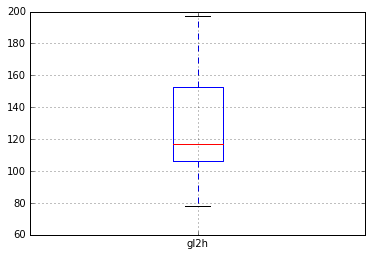

In [2]:
df = pd.read_csv("pima-indians-diabetes.data-small-orig", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

print(df)
print(df.describe())
df.boxplot(column='gl2h')
plt.show()

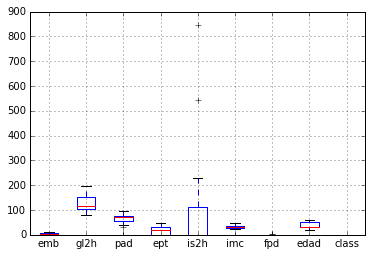

In [3]:
df.boxplot()
plt.show()

Obsérvese que los datos en cero ejercen un efecto importante en el análisis. En el caso de la columna *is2h*, por ejemplo, con 11 valores faltantes puestos a cero, pareciera que ese es un valor *típico*. En estos casos es importanta realizar previamente el análisis para detectar valores faltantes expresados como 0. A continuación, realizamos el análisis con los datos después de hacer una imputación con la media.

            emb        gl2h        pad        ept        is2h        imc  \
count  20.00000   20.000000  20.000000  20.000000   20.000000  20.000000   
mean    4.50000  129.400000  68.555556  32.363636  258.111111  32.578947   
std     3.56149   35.354446  15.462083   6.450400  170.973511   6.335496   
min     0.00000   78.000000  30.000000  19.000000   83.000000  23.300000   
25%     1.00000  106.000000  65.500000  31.500000  173.250000  27.850000   
50%     4.50000  117.000000  70.000000  32.363636  258.111111  30.750000   
75%     7.25000  152.500000  74.000000  33.022727  258.111111  35.875000   
max    10.00000  197.000000  96.000000  47.000000  846.000000  45.800000   

             fpd       edad     class  
count  20.000000  20.000000  20.00000  
mean    0.511650  37.450000   0.65000  
std     0.513691  11.591626   0.48936  
min     0.134000  21.000000   0.00000  
25%     0.198500  30.750000   0.00000  
50%     0.374500  32.000000   1.00000  
75%     0.560000  50.250000   1.000

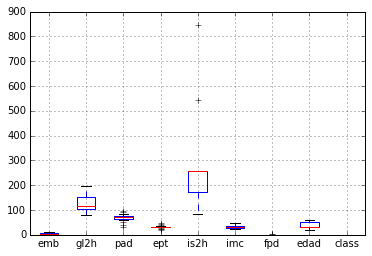

In [4]:
df = pd.read_csv("pima-indians-diabetes.data-small", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])
df2 = df.fillna(df.mean())
print(df2.describe(), '\n')
print(df2)

df2.boxplot()
plt.show()

Obsérvese que la columna *is2h* (Cantidad de insulina en suero en dos horas) sigue teniendo un comportamiento problemático. Aparentemente, hasyta donde podemos *adivinar* de los datos, 543 y 846 son valores atípicos. Sin embargo, con 11 valores faltantes (55%) es poco lo que se puede decir con certeza del comportamiento de estos datos.


<hr style="border-width: 3px;">


### Tarea 3

Analice los problemas de valores atípicos en el conjunto de datos *Pima Indians Diabetes* completo. 

**Fecha de entrega**: Martes 6 de septiembre.